<h2 id="exercises">Exercises</h2>


<p>Do your work for this exercise in a notebook named <code>modeling</code> within your <code>clustering-exercises</code> repository.</p>


1. Clustering with the Iris Dataset
Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.

    b. Visualize the results of your clustering.

    c. Use the elbow method to visually select a good value for `k`
    
    d. Repeat the clustering, this time with 3 different features.



In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# custom visuals for this lesson
import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

In [2]:
from pydataset import data

# import data
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# define independent variables for k-means

X = iris[['sepal_width', 'petal_width']]
X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


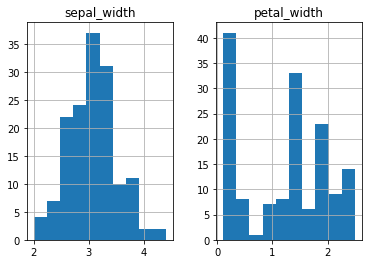

In [5]:
# look at distribution of sepal length and petal_length

X.hist();

In [6]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [7]:
# look at the head
X_scaled.head()

,sepal_width,petal_width
1,1.019004,-1.315444
2,-0.131979,-1.315444
3,0.328414,-1.315444
4,0.098217,-1.315444
5,1.249201,-1.315444


In [8]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123, verbose=1)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

Initialization complete
Iteration 0, inertia 158.636657271126
Iteration 1, inertia 88.14918925628348
Iteration 2, inertia 83.48494009264729
Iteration 3, inertia 81.6117733715475
Iteration 4, inertia 80.76534419556978
Iteration 5, inertia 80.06031964900933
Iteration 6, inertia 79.43532677278705
Iteration 7, inertia 79.26009593454634
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 101.603195193651
Iteration 1, inertia 82.94120762004925
Iteration 2, inertia 81.36597457968448
Iteration 3, inertia 80.62270671705252
Iteration 4, inertia 80.06031964900933
Iteration 5, inertia 79.43532677278705
Iteration 6, inertia 79.26009593454634
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 131.9529109643775
Iteration 1, inertia 105.60631839456369
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 118.81346289264421
Iteration 1, inertia 80.2840183116499
Converged at iteration 1: s

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [9]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [10]:
# lets look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
132,7.9,3.8,6.4,2.0,virginica,1
143,5.8,2.7,5.1,1.9,virginica,2
150,5.9,3.0,5.1,1.8,virginica,1
128,6.1,3.0,4.9,1.8,virginica,1
119,7.7,2.6,6.9,2.3,virginica,1
...,...,...,...,...,...,...
24,5.1,3.3,1.7,0.5,setosa,0
78,6.7,3.0,5.0,1.7,versicolor,1
49,5.3,3.7,1.5,0.2,setosa,0
77,6.8,2.8,4.8,1.4,versicolor,2


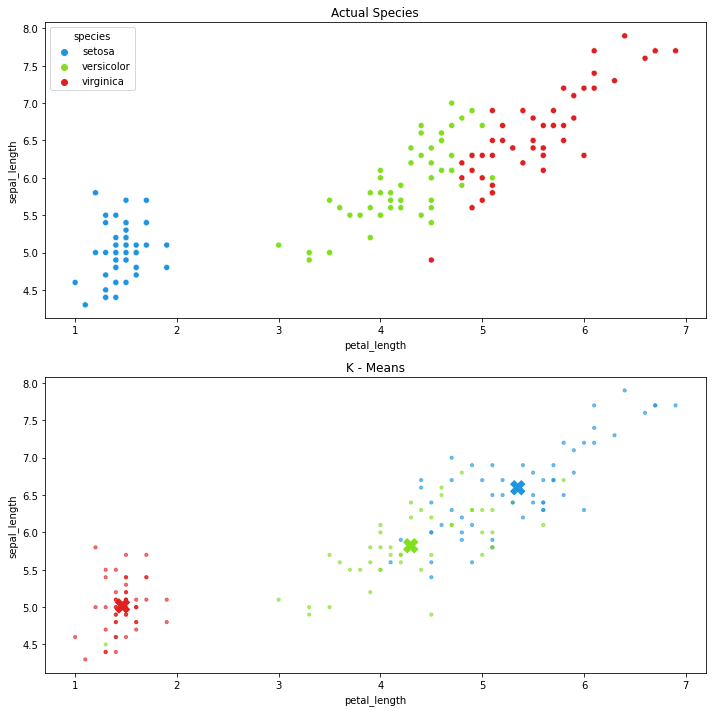

In [11]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

In [12]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[ 0.90625492, -1.25634413],
       [ 0.06891952,  0.96059584],
       [-1.04776227,  0.18974112]])

In [13]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_width,petal_width
0,0.906255,-1.256344
1,0.068920,0.960596
2,-1.047762,0.189741


In [14]:
# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_width', 'petal_width'].mean()
centroids

,sepal_width,petal_width
cluster,,
0,3.451020,0.244898
1,3.087273,1.929091
2,2.602174,1.343478


In [15]:
# How to get unscaled centroids?

scaler.inverse_transform(kmeans.cluster_centers_)

array([[3.45102041, 0.24489796],
       [3.08727273, 1.92909091],
       [2.60217391, 1.34347826]])

In [16]:
# Labels (same as from predict)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

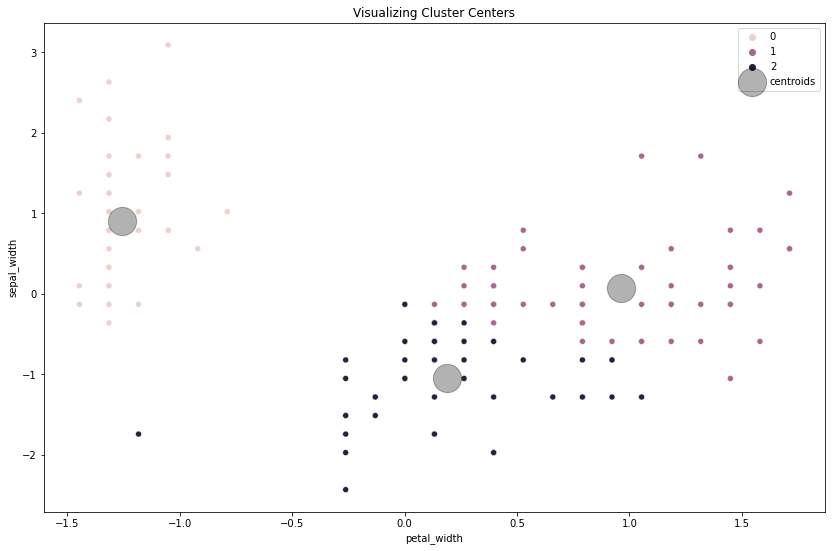

In [17]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y ='sepal_width', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [18]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


In [19]:
# to avoid Seaborn 'hue' issue with integers, I change the cluster columns from integer to string
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_0
2,4.9,3.0,1.4,0.2,setosa,cluster_0
3,4.7,3.2,1.3,0.2,setosa,cluster_0
4,4.6,3.1,1.5,0.2,setosa,cluster_0
5,5.0,3.6,1.4,0.2,setosa,cluster_0


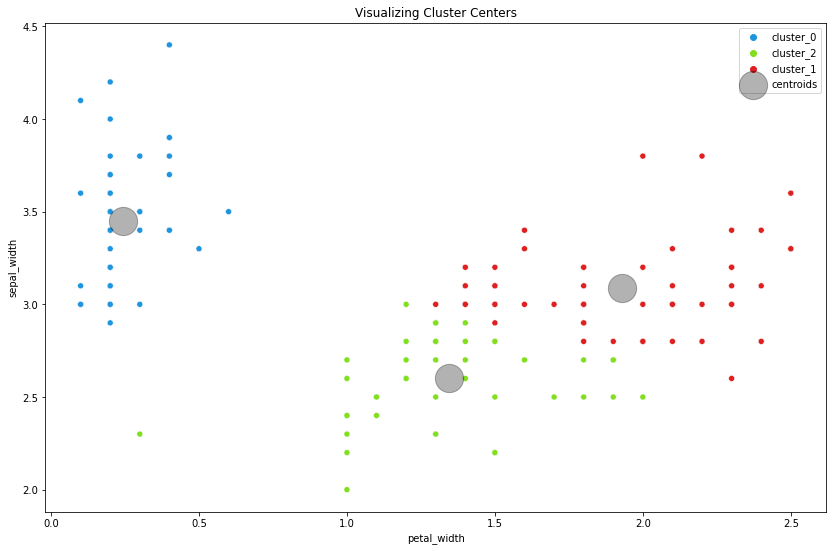

In [20]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y ='sepal_width', data = iris, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_width', y = 'sepal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')
plt.title('Visualizing Cluster Centers')
plt.legend();

In [21]:
X = iris[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

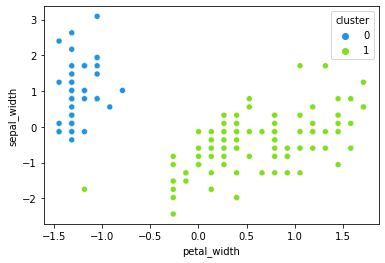

In [22]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='petal_width', y='sepal_width', data = X_scaled, hue = 'cluster')

In [23]:
# kmeans object has 'interia' attribute
kmeans.inertia_

125.36847212365329

In [24]:
X = iris[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

125.36847212365329

In [25]:
# interia with k = 3
k =3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

79.23725838536699

In [26]:
# interia with k = 4

k =4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

59.20714767894183

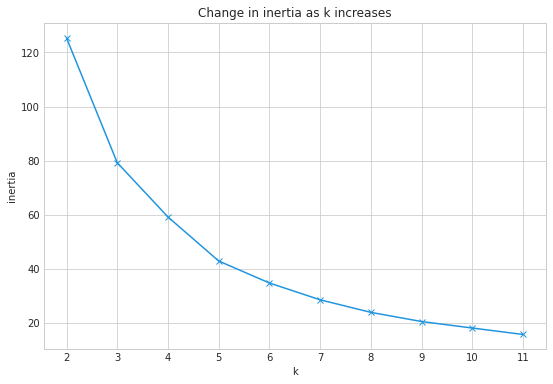

In [27]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

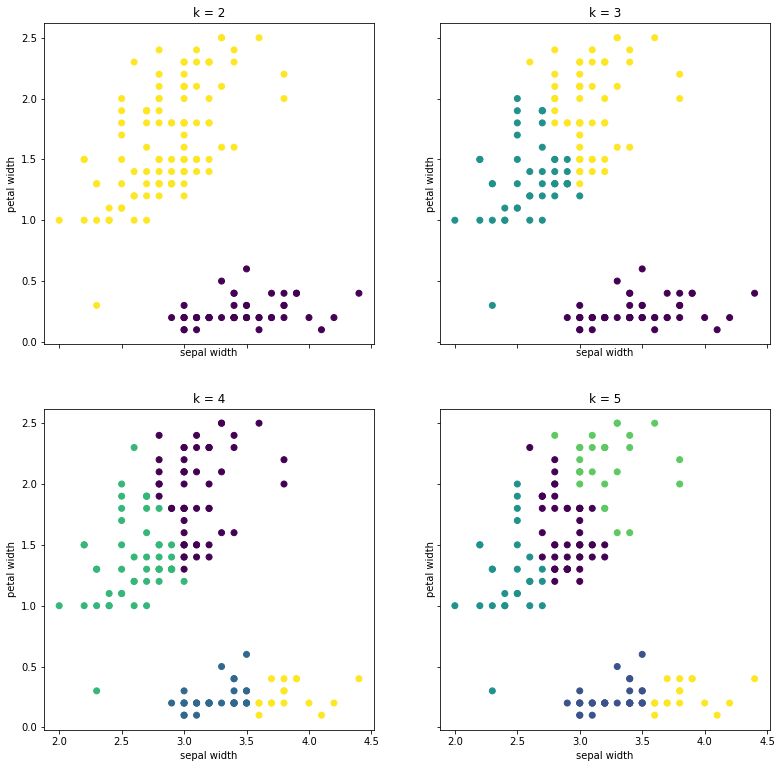

In [28]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

## Three feature iris clustering

In [29]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_0
2,4.9,3.0,1.4,0.2,setosa,cluster_0
3,4.7,3.2,1.3,0.2,setosa,cluster_0
4,4.6,3.1,1.5,0.2,setosa,cluster_0
5,5.0,3.6,1.4,0.2,setosa,cluster_0


<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

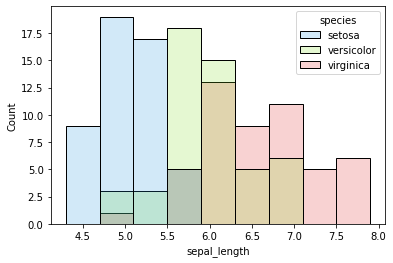

In [30]:
sns.histplot(data=iris, x='sepal_length', hue='species', alpha=0.2)

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

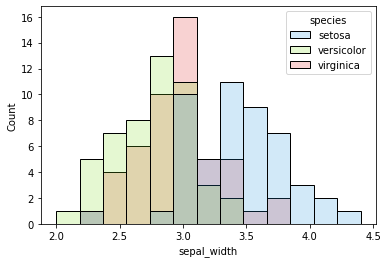

In [31]:
sns.histplot(data=iris, x='sepal_width', hue='species', alpha=0.2)

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

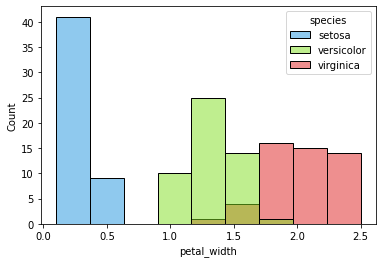

In [32]:
sns.histplot(data=iris, x='petal_width', hue='species')

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

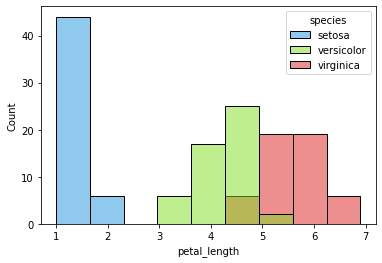

In [33]:
sns.histplot(data=iris, x='petal_length', hue='species')

Use petal width and length plus sepal length

In [34]:
# define independent variables for k-means

X = iris[[ 'petal_length', 'petal_width', 'sepal_length']]
X.head()

,petal_length,petal_width,sepal_length
1,1.4,0.2,5.1
2,1.4,0.2,4.9
3,1.3,0.2,4.7
4,1.5,0.2,4.6
5,1.4,0.2,5.0


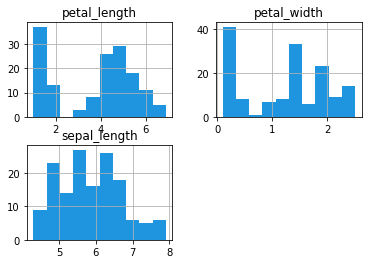

In [35]:
# look at distribution of sepal length and petal_length

X.hist();

In [36]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [37]:
# look at the head
X_scaled.sample(25)

,petal_length,petal_width,sepal_length
46,-1.340227,-1.183812,-1.264185
70,0.080709,-0.130755,-0.294842
33,-1.283389,-1.447076,-0.779513
124,0.649083,0.790671,0.553333
87,0.535409,0.395774,1.038005
...,...,...,...
102,0.762758,0.922303,-0.052506
132,1.501645,1.053935,2.492019
50,-1.340227,-1.315444,-1.021849
111,0.762758,1.053935,0.795669


In [38]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123, verbose=1)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

Initialization complete
Iteration 0, inertia 107.12504805737184
Iteration 1, inertia 70.81241984022716
Iteration 2, inertia 67.27466211140748
Iteration 3, inertia 65.59624557892886
Iteration 4, inertia 63.918422086974665
Iteration 5, inertia 63.55781147021071
Iteration 6, inertia 63.39162095301205
Iteration 7, inertia 63.2933711019286
Iteration 8, inertia 63.23746419659447
Iteration 9, inertia 63.20961652407909
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 70.96056467166355
Iteration 1, inertia 63.24364455736142
Iteration 2, inertia 63.173168217161646
Iteration 3, inertia 63.12668323000086
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 83.81589879430027
Iteration 1, inertia 64.03765716213778
Iteration 2, inertia 63.12668323000086
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 181.0937698334223
Iteration 1, inertia 79.99691132332327
Iteration 2, inertia 67

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

In [39]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [40]:
# lets look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
64,6.1,2.9,4.7,1.4,versicolor,0
67,5.6,3.0,4.5,1.5,versicolor,0
28,5.2,3.5,1.5,0.2,setosa,1
105,6.5,3.0,5.8,2.2,virginica,2
21,5.4,3.4,1.7,0.2,setosa,1
...,...,...,...,...,...,...
61,5.0,2.0,3.5,1.0,versicolor,0
137,6.3,3.4,5.6,2.4,virginica,2
100,5.7,2.8,4.1,1.3,versicolor,0
23,4.6,3.6,1.0,0.2,setosa,1


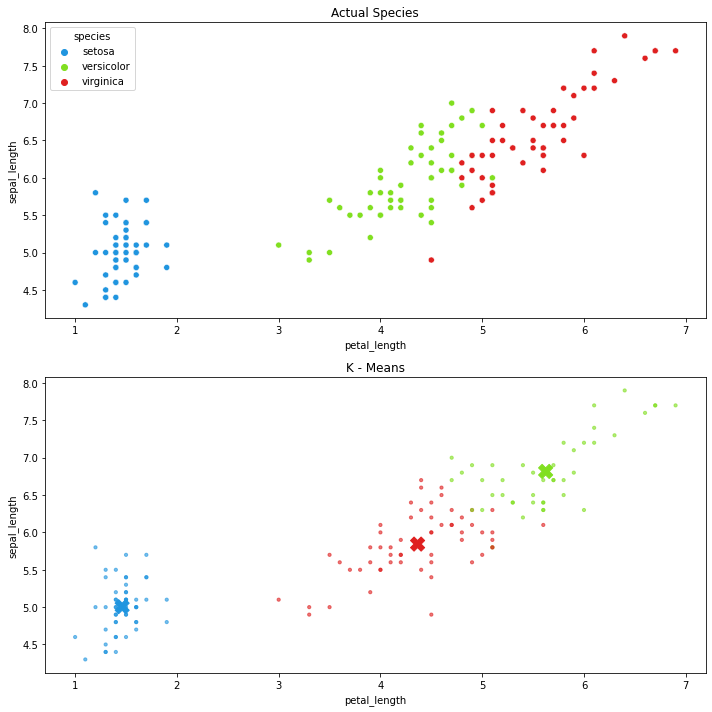

In [41]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!


In [42]:
def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [43]:
sql = 'select * from customers'


In [44]:
# acquire mall customers data using the query:

def get_mall_customers(sql):
    url = get_db_url('mall_customers')
    mall_df = pd.read_sql(sql, url, index_col='customer_id')
    return mall_df

In [45]:
# acquire data

mall_df = get_mall_customers(sql)

In [46]:
mall_df.head()


,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [47]:
df = mall_df

In [48]:
def encode_gender(row):
    if row['gender'] == 'Male':
        return 1
    if row['gender'] == 'Female':
        return 0


In [49]:
df['is_male'] = df.apply (lambda row: encode_gender(row), axis=1)


In [50]:
df.sample(25)

,gender,age,annual_income,spending_score,is_male
customer_id,,,,,
168,Female,33,86,95,0
60,Male,53,46,46,1
112,Female,19,63,54,0
99,Male,48,61,42,1
54,Male,59,43,60,1
...,...,...,...,...,...
135,Male,20,73,5,1
192,Female,32,103,69,0
179,Male,59,93,14,1


In [72]:
# import mitosheet
# mitosheet.sheet()

In [74]:

X = df[['age', 'annual_income', 'spending_score', 'is_male']]
X.head()

,age,annual_income,spending_score,is_male
customer_id,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


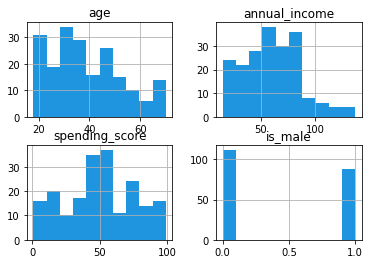

In [75]:
# look at distribution of sepal length and petal_length

X.hist();

In [76]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [77]:
# look at the head
X_scaled.head()

,age,annual_income,spending_score,is_male
1,-1.424569,-1.738999,-0.434801,1.128152
2,-1.281035,-1.738999,1.195704,1.128152
3,-1.352802,-1.700830,-1.715913,-0.886405
4,-1.137502,-1.700830,1.040418,-0.886405
5,-0.563369,-1.662660,-0.395980,-0.886405


In [78]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123, verbose=1)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

Initialization complete
Iteration 0, inertia 626.5437228319262
Iteration 1, inertia 533.8441887063292
Iteration 2, inertia 523.3250307170109
Iteration 3, inertia 516.3646763632919
Iteration 4, inertia 511.0894538750672
Iteration 5, inertia 506.84030575534996
Iteration 6, inertia 503.36044369875583
Iteration 7, inertia 502.2648261417952
Iteration 8, inertia 502.0387868074586
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 614.4056371285462
Iteration 1, inertia 520.6505041032735
Iteration 2, inertia 500.4368698603111
Iteration 3, inertia 495.3931657179345
Iteration 4, inertia 491.6339856039199
Iteration 5, inertia 490.49225048319545
Iteration 6, inertia 489.8222127747815
Iteration 7, inertia 489.5731167221885
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 616.0205210018681
Iteration 1, inertia 506.8991609739535
Iteration 2, inertia 493.07765043386684
Iteration 3, inertia 491.4030147563732
Iteration 4, 

array([0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0], dtype=int32)

In [79]:
# make a new column names cluster in iris and X_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [80]:
df.sample(25)

,gender,age,annual_income,spending_score,is_male,cluster
customer_id,,,,,,
26,Male,29,28,82,1,0
85,Female,21,54,57,0,0
187,Female,54,101,24,0,1
120,Female,50,67,57,0,1
38,Female,30,34,73,0,0
...,...,...,...,...,...,...
91,Female,68,59,55,0,1
180,Male,35,93,90,1,0
28,Male,35,28,61,1,0


In [83]:
kmeans.cluster_centers_

array([[-0.76790358,  0.05687245,  0.9389965 ,  0.09569148],
       [ 0.35241488, -0.10846569, -0.50971069, -0.88640526],
       [ 0.74307816,  0.06431159, -0.79449512,  1.12815215]])

In [84]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,age,annual_income,spending_score,is_male
0,-0.767904,0.056872,0.938996,0.095691
1,0.352415,-0.108466,-0.509711,-0.886405
2,0.743078,0.064312,-0.794495,1.128152


In [85]:
# How to get unscaled centroids?

scaler.inverse_transform(kmeans.cluster_centers_)

array([[28.15      , 62.05      , 74.3875    ,  0.4875    ],
       [43.76056338, 57.71830986, 37.07042254, -0.        ],
       [49.20408163, 62.24489796, 29.73469388,  1.        ]])

In [86]:
# Labels (same as from predict)

kmeans.labels_

array([0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0], dtype=int32)

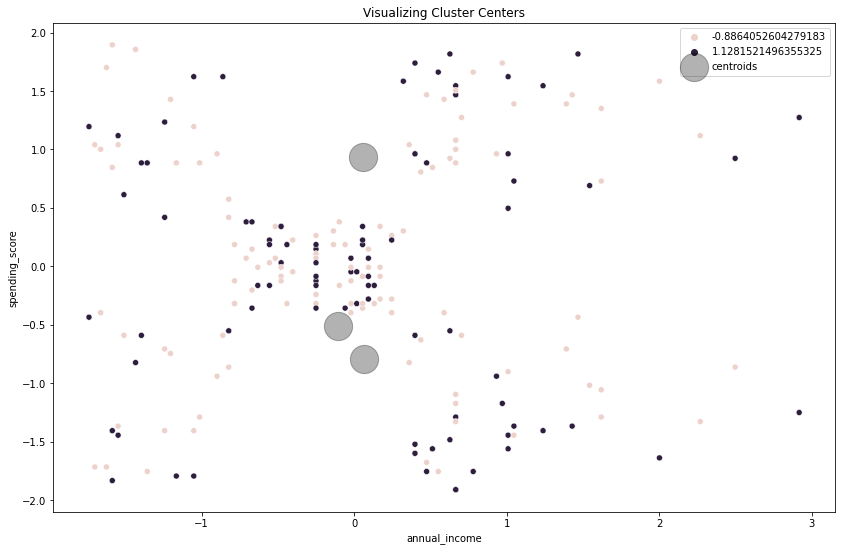

In [89]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'annual_income', y = 'spending_score', data = X_scaled, hue = 'is_male')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'annual_income', y = 'spending_score',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

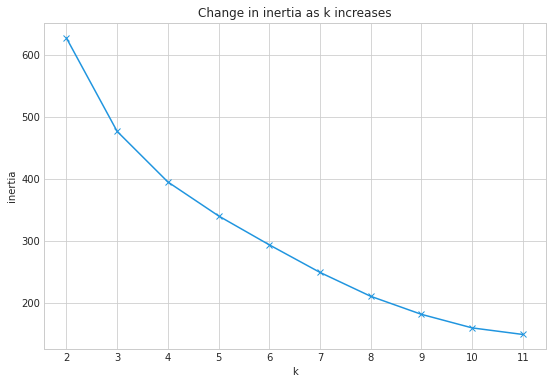

In [90]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

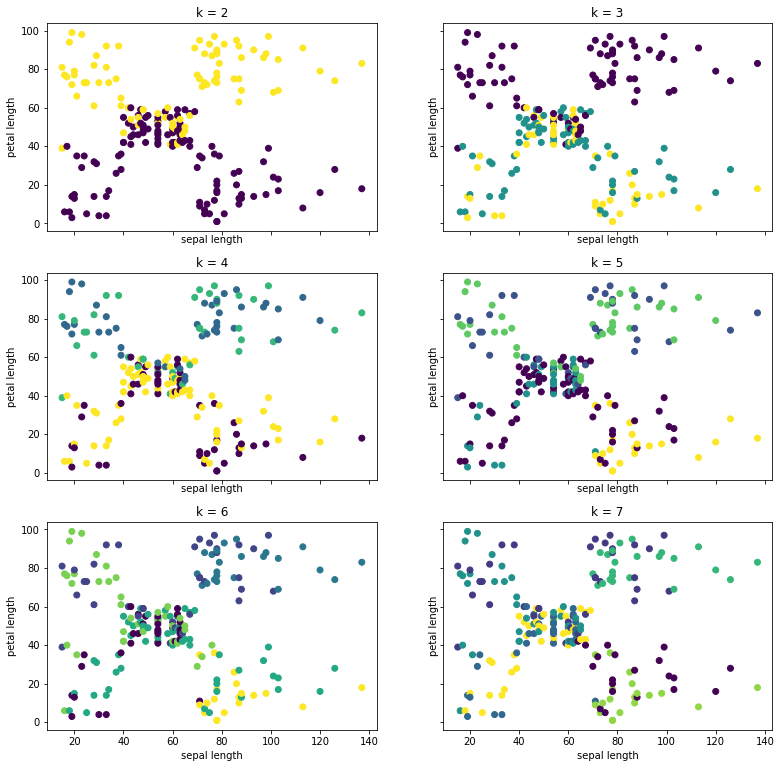

In [94]:
# What value of k is appropriate?

fig, axs = plt.subplots(3, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 8)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.annual_income, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

Looks like k=5 is a good number of clusters



3. How does scaling impact the results of clustering?


Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.




<p><strong>Bonus</strong><br />
a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing<br />
b) Visualize the data and guess the number and shape of the clusters.<br />
c) Implement the KMeans algorithm on unscaled data and visualize the clusters.<br />
d) Repeat the step above but with scaled data.  <br />
c) Write down the takeaways from this exercise.</p>